# Deep Learrning - Sequence Model
## Sequence data?
- Speech recognition : 파동의 연속 --> 단어의 연속으로 변환
- Music generation : 연속된 음표 출력
- Sentiment classification : text --> 평점, 부정/긍정 판단
- DNA 분석 : 염기서열 --> 질병 유무, 단백질 종류 등
- 자동 번역 : 한국어 --> 영어
- Video activity recognition : 연속된 장면 --> 행동 판단
- Financial Data : 시계열 자료 --> 주가, 환율 예측 등

## RNN(Recurrent Neural Network)
- \* 시퀀스 데이터에 특화
- *기억* 능력을 갖고 있음
    - 네트워크의 기억 : 지금까지의 입력 데이터를 요약한 정보. 새로운 입력이 들어올때마다 네트워크는 자신의 기억을 조금씩 수정
- 입력을 모두 처리한 후 네트워크에 남겨진 기억은 시퀀스 전체를 요약.
    - 사람의 정보 처리 방식과 비슷. 기억을 바탕으로 새로운 단어 이해
- 이 과정을 새로운 단어마다 예속해서 반복 --> Recurrent(순환적)

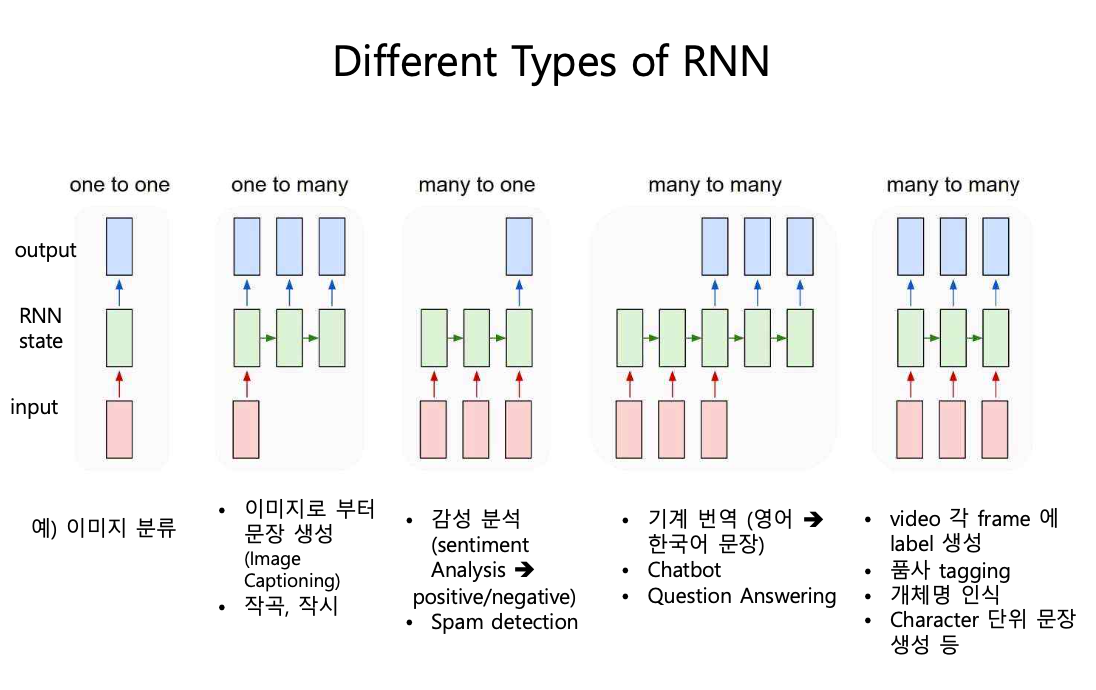

### LSTM (Long Short-term Memory)
: long-term memory으로 가져갈지 short-term memory으로 가져갈지 결정
- 문장이 길어지면 long-term memory  필요

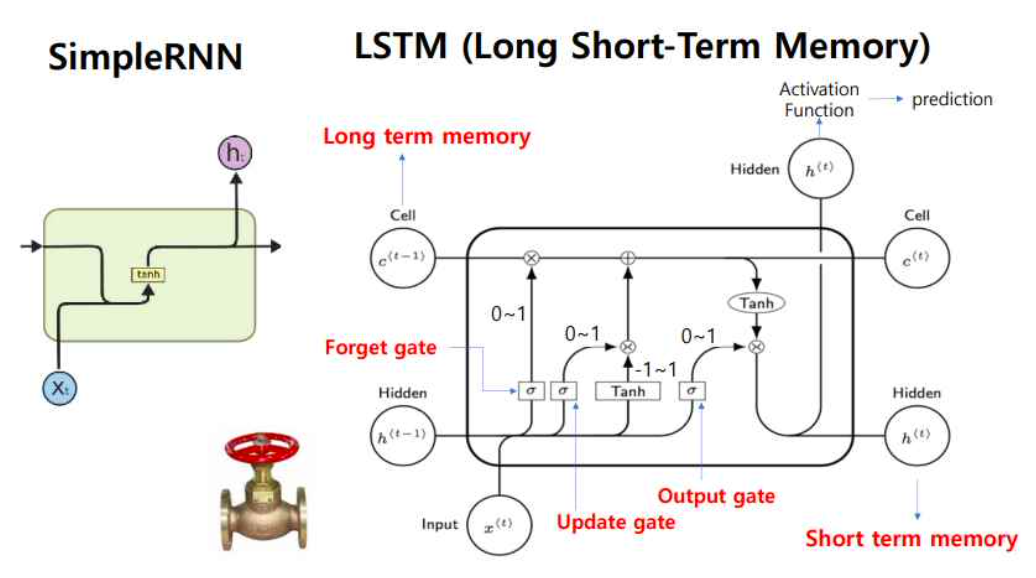
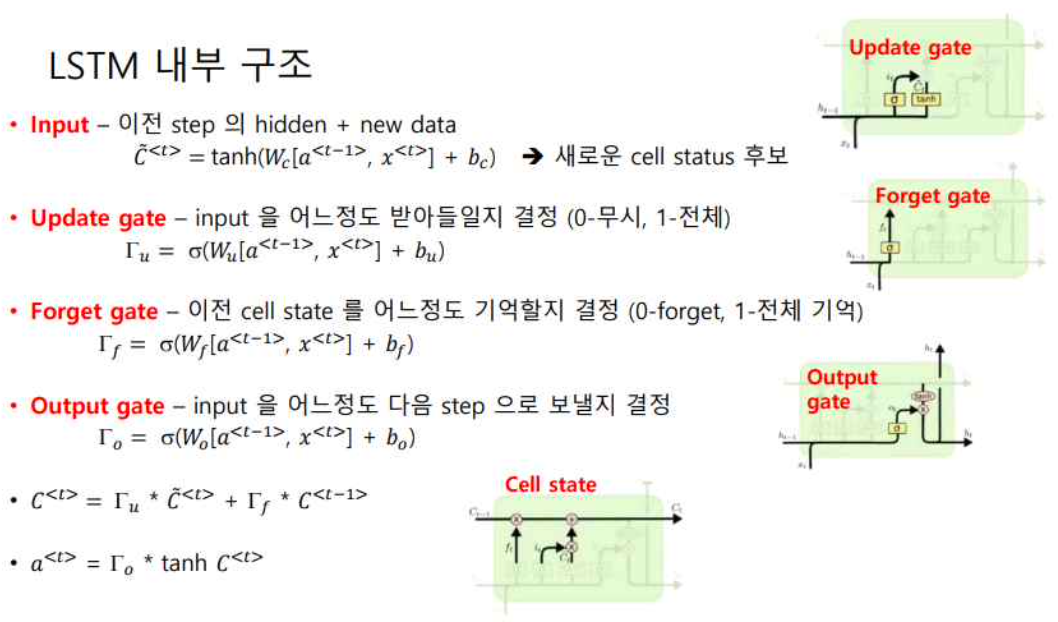

### GRU (Gated Recurrent Unit)
- LSTM의 장점을 유지하면서 일부 Gate를 생략하여 계산의 복잡성을 낮춤

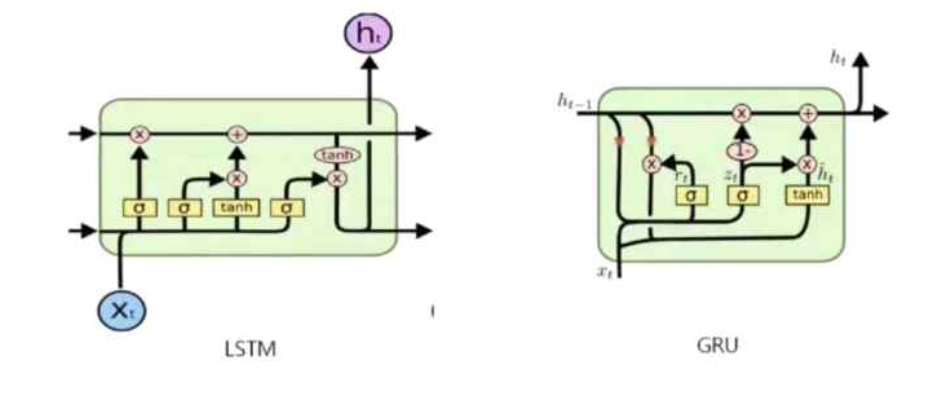

### LSTM/GRU input/output shape

- return_sequences = False, True 일 때의 output 비교

- return_state = False, True 일 때의 internal state output 비교

- Bidirectional LSTM/GRU 의 output 비교

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, GRU
import numpy as np
import warnings
warnings.filterwarnings('ignore')

B = 2   # batch size
T = 5   #Time Steps
D = 1   #features
U = 3   #LSTM units

X = np.random.randn(B, T, D)
print(X.shape)

2023-08-28 10:46:27.592921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(2, 5, 1)


### LSTM

#### return_sequences

- False (default) - last time step 의 output 만 반환
- True - 모든 timestep 의 output 을 모두 반환

In [2]:
def lstm(return_sequences=False):
    inp = Input(shape=(T, D)) 
    out = LSTM(U, return_sequences=return_sequences)(inp)
    
    model = Model(inputs=inp, outputs=out)
    return model.predict(X)

print("---- return_sequences=False ----> last timestep 의 output 만 반환")
lstm_out = lstm(return_sequences=False)
print(lstm_out.shape)
print(lstm_out)

print("\n---- return_sequences=True ----> 모든 timestep 별 output 출력")
lstm_out = lstm(return_sequences=True)
print(lstm_out.shape)
print(lstm_out)

---- return_sequences=False ----> last timestep 의 output 만 반환
1/1 [==============================] - 2s 2s/step
(2, 3)
[[ 0.05721728 -0.02240769 -0.02472328]
 [ 0.14057879 -0.02789519 -0.07134324]]

---- return_sequences=True ----> 모든 timestep 별 output 출력
1/1 [==============================] - 1s 1s/step
(2, 5, 3)
[[[-0.00600866  0.06478446 -0.02843272]
  [-0.00486728  0.03008249 -0.01337367]
  [-0.01098902  0.08231896 -0.034452  ]
  [-0.02786607  0.1937658  -0.1054735 ]
  [-0.00434818 -0.01377539 -0.05825684]]

 [[ 0.0027887  -0.03224267  0.01217692]
  [-0.01671828  0.10985705 -0.15830755]
  [-0.02872176  0.22772695 -0.22355223]
  [-0.02559802  0.09519139 -0.18022805]
  [-0.03884836  0.07102474 -0.12904923]]]


#### return_state

- False (default) - output 만 반환
- True - output, last step 의 hidden state, cell state (LSTM 의 경우) 반환

In [3]:
def lstm(return_state=False):
    inp = Input(shape=(T, D))
    out = LSTM(U, return_state=return_state)(inp)
    
    model = Model(inputs=inp, outputs=out)
    
    if return_state:
        o, h, c = model.predict(X)
        print("o :", o.shape)
        print(o)
        print("h :", h.shape)
        print(h)
        print("c :", c.shape)
        print(c)
    else:
        o = model.predict(X)
        print("o :", o.shape)
        print(o)

print("---- return_state=False ----> outout only")       
lstm(return_state=False)
print("\n---- return_state=True ----> outout, hidden state, cell state all")      
lstm(return_state=True)

---- return_state=False ----> outout only
1/1 [==============================] - 1s 1s/step
o : (2, 3)
[[-0.05837501 -0.01147887 -0.12173521]
 [-0.13237429 -0.08430672  0.00600481]]

---- return_state=True ----> outout, hidden state, cell state all
1/1 [==============================] - 2s 2s/step
o : (2, 3)
[[ 0.01100038  0.09699672 -0.11442593]
 [ 0.05629248  0.20373027 -0.18481645]]
h : (2, 3)
[[ 0.01100038  0.09699672 -0.11442593]
 [ 0.05629248  0.20373027 -0.18481645]]
c : (2, 3)
[[ 0.03296241  0.15764557 -0.28507176]
 [ 0.10235881  0.42815307 -0.37224364]]


### Bidirectional LSTM

- 순방향, 역방향이 concatenate 된 output 출력  

- hidden state, cell state 는 순방향, 역방향 별도 출력

In [4]:
T, D, U

(5, 1, 3)

In [5]:
def bi_lstm(return_sequences=False, return_state=False):
    inp = Input(shape=(T, D))
    out = Bidirectional(
            LSTM(U, return_state=return_state, return_sequences=return_sequences))(inp)
    
    model = Model(inputs=inp, outputs=out)
    
    if return_state:    
        o, h1, c1, h2, c2 = model.predict(X)
        print("o :",o.shape)
        print("h1 :", h1.shape)
        print("c1 :", c1.shape)
        print("h2 :", h2.shape)
        print("c2 :", c2.shape)
    else:
        o = model.predict(X)
        print("o :", o.shape)

print("*** 순방향, 역방향이 concatenate ***")
print("---- return_sequences=False ----> last timestep 의 output 만 반환")
bi_lstm(return_sequences=False, return_state=False)
print()
print("---- return_sequences=True ----> 모든 timestep 별 output 출력")
bi_lstm(return_sequences=True)
print()
print("---- return_sequences=True, return_state=True")
bi_lstm(return_state=True)

*** 순방향, 역방향이 concatenate ***
---- return_sequences=False ----> last timestep 의 output 만 반환
1/1 [==============================] - 2s 2s/step
o : (2, 6)

---- return_sequences=True ----> 모든 timestep 별 output 출력
1/1 [==============================] - 2s 2s/step
o : (2, 5, 6)

---- return_sequences=True, return_state=True
1/1 [==============================] - 2s 2s/step
o : (2, 6)
h1 : (2, 3)
c1 : (2, 3)
h2 : (2, 3)
c2 : (2, 3)


### GRU 

- cell state 가 없는 것만 LSTM 과 차이

In [6]:
def gru(return_sequences=False, return_state=False):
    inp = Input(shape=(T, D))
    out = GRU(U, return_state=return_state, return_sequences=return_sequences)(inp)
    
    model = Model(inputs=inp, outputs=out)
    
    if return_state:    
        o, h = model.predict(X)
        print("o :", o.shape)
        print("h :", h.shape)
    else:
        o = model.predict(X)
        print("o :", o.shape)

print("---- Many-to-One output ----")
gru(return_sequences=False, return_state=False)
print()
print("---- Many-to-Many output ----")
gru(return_sequences=True)
print()
print("---- Sequence-to-Vector output ----")
gru(return_state=True)

---- Many-to-One output ----
1/1 [==============================] - 1s 1s/step
o : (2, 3)

---- Many-to-Many output ----
1/1 [==============================] - 1s 915ms/step
o : (2, 5, 3)

---- Sequence-to-Vector output ----
1/1 [==============================] - 1s 1s/step
o : (2, 3)
h : (2, 3)


### Bidirectional GRU

- cell state 가 없는 것 외에 LSTM 과 동일

In [7]:
def bi_gru(return_sequences=False, return_state=False):
    inp = Input(shape=(T, D))
    out = Bidirectional(
            GRU(U, return_state=return_state, return_sequences=return_sequences))(inp)
    
    model = Model(inputs=inp, outputs=out)
    if return_state:    
        o, h1, h2 = model.predict(X)
        print("o :", o.shape)
        print("h1 :", h1.shape)
        print("h2 :", h2.shape)
    else:
        o = model.predict(X)
        print("o :", o.shape)
        
print("---- 순방향, 역방향이 concatenate 된 many-to-one output")
bi_gru(return_sequences=False, return_state=False)
print()
print("---- 순방향, 역방향이 concatenate 된 many-to-many output")
bi_gru(return_sequences=True)
print()
print("---- 순방향, 역방향이 concatenate 된 sequence-to-vector output")
bi_gru(return_state=True)

---- 순방향, 역방향이 concatenate 된 many-to-one output
1/1 [==============================] - 2s 2s/step
o : (2, 6)

---- 순방향, 역방향이 concatenate 된 many-to-many output
1/1 [==============================] - 2s 2s/step
o : (2, 5, 6)

---- 순방향, 역방향이 concatenate 된 sequence-to-vector output
1/1 [==============================] - 1s 1s/step
o : (2, 6)
h1 : (2, 3)
h2 : (2, 3)


## Sentiment Analysis (감성분석)
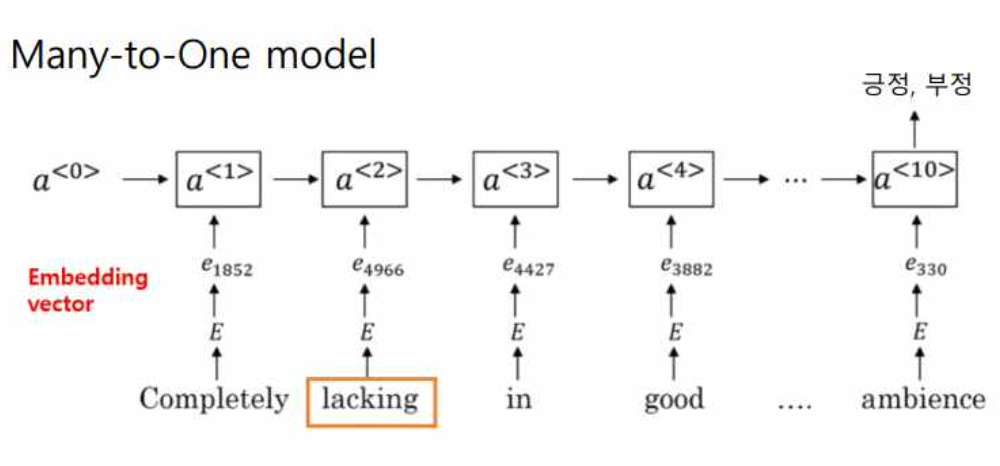
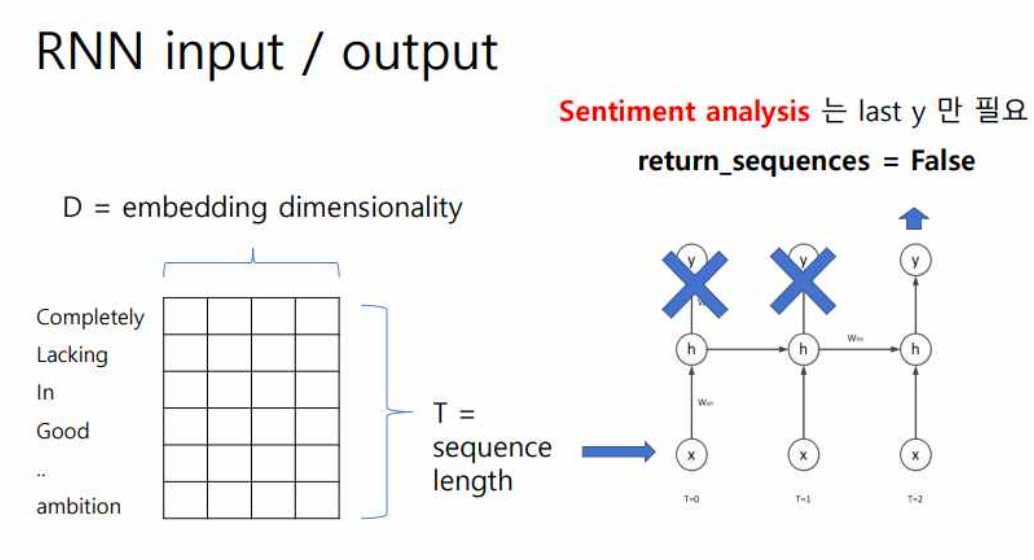

### 실습 : IMDB 영화 관람평 분류

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dataset, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

2023-08-28 11:19:23.243072: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /Users/heewonkim/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOYK51F/imdb_reviews-tra…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /Users/heewonkim/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOYK51F/imdb_reviews-tes…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /Users/heewonkim/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOYK51F/imdb_reviews-uns…

Dataset imdb_reviews downloaded and prepared to /Users/heewonkim/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [29]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path=PosixGPath('/var/folders/jr/dn14k3s96vl0_2c3dwzw6b3c0000gn/T/tmpdog8eha1tfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=2500

In [10]:
len(train_dataset), len(test_dataset)

(25000, 25000)

### tfds 는 tf.Tensor 반환

In [11]:
for input, label in dataset['test']:
    print(label)
    print(input)
    break

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", shape=(), 

2023-08-28 11:33:05.263225: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## keras.preprocessing module 을 이용하여 tokenize 및 padding
- keras.preprocessing.text.Tokenizer  

- keras.preprocessing.sequence.pad_sequence

In [12]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for sent, label in train_dataset:
    train_sentences.append(str(sent.numpy()))
    train_labels.append(label.numpy())

for sent, label in test_dataset:
    test_sentences.append(str(sent.numpy()))
    test_labels.append(label.numpy())

# 마지막 문장의 라벨과 문장 확인
print(train_labels[-1])
print(train_sentences[-1])

print(test_labels[-1])
print(test_sentences[-1])

1
b'First of all, Riget is wonderful. Good comedy and mystery thriller at the same time. Nice combination of strange \'dogma\' style of telling the story together with good music and great actors. But unfortunately there\'s no \'the end\'. As for me it\'s unacceptable. I was thinking... how it will be possible to continue the story without Helmer and Drusse? ...and I have some idea. I think Lars should make RIGET III a little bit different. I\'m sure that 3rd part without Helmer wouldn\'t be the same. So here\'s my suggestion. Mayble little bit stupid, maybe not. I know that Lars likes to experiment. So why not to make small experiment with Riget3? I think the only solution here is to create puppet-driven animation (like for example "team America" by Trey Parker) or even computer 3d animation. I know it\'s not the same as real actors, but in principle I believe it could work... only this way it\'s possible to make actors alive again. For Riget fans this shouldn\'t be so big difference 

### train_labels, test_labels  list를 numpy array 로 변환

In [13]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(train_labels.shape)
print(test_labels.shape)

(25000,)
(25000,)


### train_sentences, test_sentences text 를 sequence 로 변환 

In [14]:
vocab_size = 10000 # 10,000개로 제한

tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>') # UNK, vocab에 없는 애들
tokenizer.fit_on_texts(train_sentences)

In [15]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

print(train_sequences[0])
print(test_sequences[0])

[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10]
[59, 44, 25, 109, 13, 97, 4115, 16, 742, 4370, 10, 14, 316, 5, 2, 593, 354, 16, 1864, 1212, 1, 16, 680, 7499, 5595, 1, 773, 6, 13, 1037, 1, 1, 439, 491, 1, 4, 1, 334, 3610, 20, 229, 3, 15, 5796, 3, 15, 1646, 15, 102, 5, 2, 3597, 101, 11, 1450, 1528, 12, 251, 235, 11, 216, 2, 377, 6429, 3, 62, 95, 11, 174, 105, 11, 1528, 180, 12, 251, 37, 6, 1144, 1, 682, 7, 4452, 1, 4, 1, 334, 7, 37, 8367, 377, 5, 1420, 1, 13, 30, 64, 28, 6, 874, 181, 17, 4, 1050, 5, 12, 224, 3, 83,

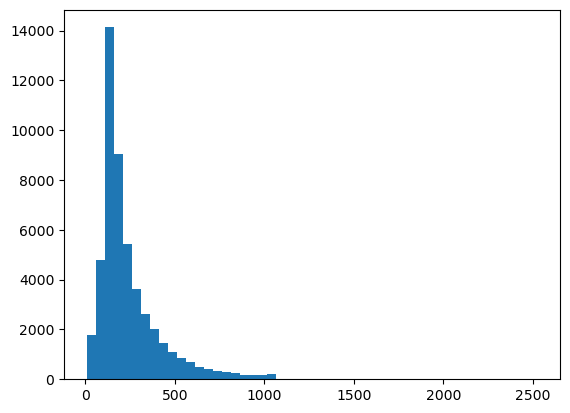

In [16]:
plt.hist([len(s) for s in train_sequences] + [len(s) for s in test_sequences], bins = 50);

- 문장의 길이의 격차가 크다 ==> padding

In [17]:
max_length = 150

train_padded = pad_sequences(train_sequences,maxlen = max_length, truncating = 'post', padding = 'post') # post : 뒤에서 자르고 뒤에서 패딩
test_padded = pad_sequences(test_sequences,maxlen = max_length, truncating = 'post', padding = 'post')

print(train_padded.shape)
print(test_padded.shape)
print(train_padded[0])
print(test_padded[0])

(25000, 150)
(25000, 150)
[  59   12   14   35  439  400   18  174   29    1    9   33 1378 3401
   42  496    1  197   25   88  156   19   12  211  340   29   70  248
  213    9  486   62   70   88  116   99   24 5740   12 3317  657  777
   12   18    7   35  406 8228  178 2477  426    2   92 1253  140   72
  149   55    2    1 7525   72  229   70 2962   16    1 2880    1    1
 1506 4998    3   40 3947  119 1608   17 3401   14  163   19    4 1253
  927 7986    9    4   18   13   14 4200    5  102  148 1237   11  240
  692   13   44   25  101   39   12 7232    1   39 1378    1   52  409
   11   99 1214  874  145   10    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
[  59   44   25  109   13   97 4115   16  742 4370   10   14  316    5
    2  593  354   16 1864 1212    1   16  680 7499 5595    1  773    6
   13 1037    1    1  439  491    1    4    1  334 3610   20  229    3

- sequence data 를 sentence 로 reverse conversion

In [18]:
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_review(sequence):
    return ' '.join([tokenizer.index_word.get(i, '<pad>') for i in sequence])

print(decode_review(train_padded[0]))
print()
print(train_sentences[0])

b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but 

## model define

In [ ]:
# 모델을 만드는 방법 2가지 - (1)
model = Sequential()
model.add(Embedding(vocab_size + 1, 64)) 
mode.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

In [19]:
# 모델을 만드는 방법 2가지 - (2)
# 구글에서 많이 사용하는 방법
model = Sequential([
    Embedding(vocab_size + 1, 64),
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid') # 0 or 1 # 로이터뉴스 카테고리 : 46
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 bidirectional_6 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714433 (2.73 MB)
Trainable params: 714433 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
%%time 
# 이 모델은 25,000개의 데이터 셋 - 언어모델에서는 엄청 작은 편. 
# 이미지모델에서 25,000개는 큰 데이터 셋
num_epochs = 30
history = model.fit(train_padded, train_labels, epochs = num_epochs, batch_size = 128,
                validation_data = (test_padded, test_labels), verbose = 1)

Epoch 1/30
196/196 [==============================] - 148s 649ms/step - loss: 0.4987 - accuracy: 0.7420 - val_loss: 0.4143 - val_accuracy: 0.8147
Epoch 2/30
196/196 [==============================] - 144s 733ms/step - loss: 0.2957 - accuracy: 0.8841 - val_loss: 0.4595 - val_accuracy: 0.8243
Epoch 3/30
196/196 [==============================] - 105s 537ms/step - loss: 0.2272 - accuracy: 0.9150 - val_loss: 0.4067 - val_accuracy: 0.8236
Epoch 4/30
196/196 [==============================] - 130s 665ms/step - loss: 0.1740 - accuracy: 0.9364 - val_loss: 0.4734 - val_accuracy: 0.8258
Epoch 5/30
196/196 [==============================] - 91s 464ms/step - loss: 0.1284 - accuracy: 0.9558 - val_loss: 0.5665 - val_accuracy: 0.8205
Epoch 6/30
196/196 [==============================] - 130s 663ms/step - loss: 0.1080 - accuracy: 0.9630 - val_loss: 0.5796 - val_accuracy: 0.8168
Epoch 7/30
196/196 [==============================] - 109s 554ms/step - loss: 0.0749 - accuracy: 0.9745 - val_loss: 0.6129 - 

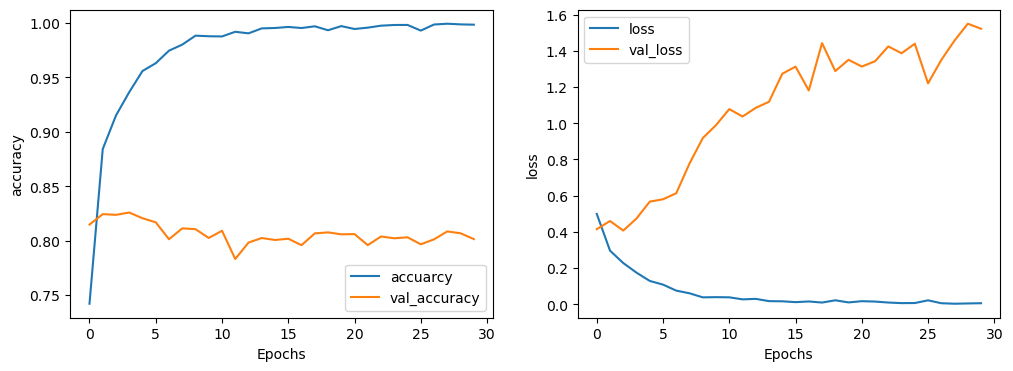

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('Epochs')
ax1.set_ylabel('accuracy')
ax1.legend(['accuarcy', 'val_accuracy'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('loss')
ax2.legend(['loss', 'val_loss'])
plt.show()
# 전형적인 오버피팅, 언어모델에서는 25,000개가 넘으면 수업하기 힘들다

In [45]:
# sample_text = ['The movie was terrible. I would not recommend the movie']
# sample_text = ['The movie was fantastic. I would recommend the movie']
sample_text = ['The animation and graphics were out of this world']
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen = max_length, padding = 'post', truncating = 'post')
sample_padded

array([[   2,  756,    3, 2888,   72,   46,    5,   12,  179,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [46]:
model.predict([sample_padded])

1/1 [==============================] - 0s 97ms/step


array([[0.9983686]], dtype=float32)